In [1]:
import pingouin as pg
import psython as psy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None, "display.max_columns", None)

## 2016 to 2017 delta for questions

In [4]:
df_2016_questions = pd.read_csv('data/acute/sem/2016_acute_questions_keyed_delta.csv')
df_2016_questions = df_2016_questions.fillna(df_2016_questions.mean().astype(int))

df_2017_questions = pd.read_csv('data/acute/sem/2017_acute_questions_keyed_delta.csv')
df_2017_questions = df_2017_questions.fillna(df_2017_questions.mean().astype(int))

<ipython-input-4-6f334330a9ec>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_2016_questions = df_2016_questions.fillna(df_2016_questions.mean().astype(int))
<ipython-input-4-6f334330a9ec>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_2017_questions = df_2017_questions.fillna(df_2017_questions.mean().astype(int))


In [5]:
##common questions between both dataframes
common_cols = [col for col in set(df_2016_questions.columns).intersection(df_2017_questions.columns)]

In [6]:
df_2016_common = df_2016_questions[common_cols].set_index('organisation_id')
df_2017_common = df_2017_questions[common_cols].set_index('organisation_id')

In [7]:
q2016 = df_2016_common.drop(['organisation_name'], axis=1)
q2017 = df_2017_common.drop(['organisation_name'], axis=1)

In [8]:
question_delta = (q2017 - q2016).dropna()
question_delta.columns = question_delta.columns.astype(int)

In [9]:
question_delta = question_delta.sort_index(axis=1)
question_delta

,1,2,3,4,5,6,7,8,9,10,14,15,16,17,18,19,20,21,22,23,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,54,55,56,57,58,59,60,61,62,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,103,105,106,107,108,109,110,111,112,113,114,117,118,119,123,124,125,126,127,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157
organisation_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
R1F,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,-61.0,25.0,0.0,25.0,25.0,25.0,20.0,0.0,20.0,0.0,0.0,-2.0,0.0,25.0,25.0,0.0,0.0,0.0,0.0,25.0,0.0,25.0,0.0,0.0,0.0,0.0,20.0,20.0,20.0,50.0,50.0,50.0,50.0,0.0,-20.0,51.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,50.0,0.0,0.0,76.0,75.0,0.0,75.0,0.0,-25.0,0.0,0.0,-80.0,-25.0,-100.0,0.0,75.0,75.0,75.0,75.0,75.0,50.0,0.0,100.0,75.0,0.0,40.0,0.0,-25.0,0.0,-6.0,50.0,-25.0,-2.0,-45.0,-20.0,0.0,-25.0,-25.0,13.0,-19.0,0.0,0.0,0.0,1.0,0.0,50.0,69.0,100.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0
R1G,0.0,0.0,0.0,0.0,0.0,-25.0,100.0,0.0,50.0,0.0,-25.0,25.0,0.0,25.0,-50.0,0.0,0.0,25.0,25.0,24.0,0.0,25.0,-25.0,0.0,0.0,20.0,20.0,0.0,0.0,50.0,0.0,50.0,50.0,75.0,25.0,0.0,25.0,25.0,25.0,0.0,25.0,50.0,25.0,50.0,60.0,0.0,20.0,100.0,0.0,0.0,25.0,0.0,20.0,-80.0,0.0,0.0,0.0,0.0,50.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,25.0,25.0,0.0,0.0,25.0,0.0,20.0,0.0,21.0,38.0,-15.0,0.0,0.0,71.0,0.0,0.0,75.0,0.0,100.0,100.0,0.0,0.0,25.0,0.0,25.0,31.0,25.0,0.0,0.0,0.0,25.0,25.0,75.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,75.0,50.0,25.0,50.0,0.0,0.0,25.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0
R1H,25.0,7.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,25.0,-27.0,0.0,0.0,0.0,25.0,0.0,0.0,20.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,25.0,0.0,25.0,0.0,25.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,-25.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-44.0,0.0,0.0,25.0,0.0,75.0,0.0,25.0,0.0,0.0,25.0,0.0,25.0,25.0,33.0,0.0,0.0,75.0,0.0,0.0,25.0,0.0,25.0,25.0,0.0,25.0,25.0,25.0,0.0,25.0,25.0
R1K,0.0,0.0,0.0,0.0,-25.0,0.0,-25.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,25.0,-25.0,0.0,-5.0,41.0,2.0,4.0,28.0,9.0,3.0,-5.0,40.0,9.0,4.0,30.0,24.0,27.0,26.0,10.0,34.0,24.0,-17.0,-44.0,20.0,20.0,0.0,100.0,0.0,0.0,25.0,0.0,-20.0,31.0,-1.0,-2.0,8.0,-12.0,6.0,-15.0,-30.0,-27.0,-8.0,-5.0,-1.0,-2.0,-24.0,2.0,-21.0,4.0,-17.0,6.0,42.0,-29.0,3.0,21.0,38.0,22.0,22.0,20.0,20.0,44.0,38.0,17.0,39.0,53.0,36.0,42.0,15.0,-12.0,30.0,-13.0,-6.0,33.0,6.0,12.0,-40.0,34.0,11.0,16.0,21.0,-24.0,-15.0,8.0,9.0,10.0,0.0,0.0,0.0,0.0,25.0,0.0,25.0,75.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RA2,75.0,2.0,50.0,25.0,50.0,25.0,50.0,25.0,50.0,100.0,25.0,25.0,25.0,0.0,-25.0,25.0,25.0,0.0,-25.0,8.0,25.0,-25.0,0.0,25.0,0.0,0.0,20.0,20.0,50.0,50.0,-2.0,0.0,-25.0,0.0,-25.0,0.0,25.0,25.0,50.0,0.0,0.0,100.0,0.0,8.0,0.0,20.0,0.0,20.0,25.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,60.0,20.0,-6.0,6.0,-2.0,12.0,60.0,15.0,100.0,0.0,0.0,40.0,75.0,0.0,50.0,50.0,0.0,20.0,20.0,20.0,25.0,25.0,75.0,100.0,100.0,0.0,0.0,0.0,0.0,100.0,75.0,25.0,0.0,25.0,25.0,25.0,25.0,-44.0,50.0,25.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,50.0,75.0,13.0,25.0,25.0,25.0,50.0,36.0,25.0,25.0,50.0,0.0,-25.0,0.0,25.0,50.0,0.0,25.0,50.0
RA3,-25.0,7.0,0.0,0.0,0.0,25.0,0.0,50.0,50.0,25.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,-23.0,0.0,25.0,-50.0,25.0,0.0,20.0,0.0,0.0,-49.0,11.0,7.0,-41.0,-6.0,-19.0,3.0,-44.0,-7.0,0.0,0.0,32.0,52.0,51.0,-18.0,0.0,34.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,80.0,80.0,0.0,25.0,25.0,25.0,-50.0,80.0,0.0,50.0,0.0,0.0,-100.0,25.0,50.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,75.0
RA4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [35]:
len(question_delta.columns)

124

## 2016 to 2017 ICC for questions

### format 2016

In [10]:
## (1) pick common columns (2) set index to organisation id (3) drop org names (4) sort columns by question number

df_2016_icc = df_2016_questions[common_cols].set_index('organisation_id').drop(['organisation_name'], axis=1).sort_index(axis=1)
df_2016_icc.columns = df_2016_icc.columns.astype(int)
df_2016_icc = df_2016_icc.sort_index(axis=1)

df_2017_icc = df_2017_questions[common_cols].set_index('organisation_id').drop(['organisation_name'], axis=1).sort_index(axis=1)
df_2017_icc.columns = df_2017_icc.columns.astype(int)
df_2017_icc = df_2017_icc.sort_index(axis=1)


In [11]:
df_2016_icc.head(5)

,1,2,3,4,5,6,7,8,9,10,14,15,16,17,18,19,20,21,22,23,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,54,55,56,57,58,59,60,61,62,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,103,105,106,107,108,109,110,111,112,113,114,117,118,119,123,124,125,126,127,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157
organisation_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
REM,100,75.0,100,75,100,100,100,100.0,100.0,100,100,75,75,75,75,75.0,75.0,75.0,75.0,74,100.0,75.0,75.0,75.0,75.0,100.0,100.0,100.0,50.0,50.0,50.0,100.0,100.0,100.0,50.0,75.0,100.0,75,0,50.0,0.0,0.0,18.0,0.0,20.0,100.0,80.0,80,100,50,75,100,100,100,80.0,100.0,100.0,60.0,100.0,75.0,100.0,75.0,60.0,100.0,100.0,100,100,100,75,75.0,100.0,100,75,100,100,20,75.0,25.0,75.0,75.0,50.0,75.0,100.0,75.0,20.0,50.0,75.0,75.0,40.0,50,50,75,50,0.0,0.0,0.0,0.0,100.0,100.0,0,50,0.0,100.0,100.0,0,100,0,87.0,0.0,0.0,75.0,75.0,50.0,100,100,100,75,100,100,100,100,100,100,100
RCF,100,100.0,100,100,100,100,100,100.0,75.0,100,100,75,100,75,100,100.0,75.0,100.0,100.0,71,75.0,75.0,100.0,100.0,100.0,40.0,20.0,20.0,50.0,0.0,50.0,100.0,100.0,75.0,75.0,75.0,75.0,75,25,75.0,0.0,100.0,100.0,50.0,100.0,60.0,80.0,80,100,75,25,75,80,100,20.0,100.0,0.0,20.0,50.0,100.0,75.0,0.0,0.0,50.0,75.0,100,100,100,75,75.0,50.0,100,75,100,100,0,75.0,25.0,50.0,100.0,0.0,50.0,100.0,25.0,0.0,25.0,50.0,25.0,0.0,100,100,25,100,75.0,75.0,75.0,75.0,50.0,50.0,50,100,50.0,100.0,100.0,50,50,0,100.0,0.0,0.0,75.0,100.0,50.0,75,75,75,75,50,100,75,100,75,75,75
RBS,100,75.0,100,100,100,100,100,100.0,100.0,75,100,75,50,75,75,100.0,100.0,75.0,50.0,83,50.0,50.0,75.0,75.0,75.0,40.0,100.0,100.0,0.0,100.0,100.0,75.0,75.0,50.0,75.0,75.0,25.0,25,25,25.0,25.0,25.0,25.0,0.0,20.0,100.0,80.0,60,25,25,25,25,40,100,100.0,100.0,100.0,80.0,75.0,75.0,25.0,75.0,0.0,25.0,50.0,100,100,60,75,25.0,75.0,75,25,80,100,80,25.0,25.0,25.0,75.0,75.0,25.0,75.0,75.0,0.0,25.0,75.0,75.0,60.0,25,75,100,25,44.0,25.0,75.0,75.0,25.0,25.0,50,75,25.0,75.0,75.0,25,25,25,100.0,0.0,0.0,0.0,50.0,0.0,100,100,75,50,75,75,75,25,100,100,100
RTK,75,75.0,75,75,50,100,100,75.0,100.0,100,100,50,100,75,25,100.0,100.0,100.0,75.0,85,50.0,75.0,50.0,100.0,100.0,20.0,100.0,40.0,0.0,50.0,50.0,25.0,25.0,0.0,50.0,0.0,25.0,25,0,25.0,0.0,25.0,0.0,0.0,20.0,20.0,0.0,80,0,100,75,0,100,100,80.0,60.0,60.0,60.0,50.0,25.0,50.0,0.0,0.0,25.0,25.0,100,100,80,25,25.0,0.0,75,25,20,20,20,0.0,25.0,25.0,25.0,25.0,25.0,25.0,0.0,0.0,0.0,100.0,0.0,100.0,0,75,75,0,44.0,0.0,25.0,0.0,50.0,75.0,25,75,0.0,100.0,100.0,0,75,25,100.0,0.0,0.0,0.0,0.0,0.0,75,75,75,50,50,100,100,75,75,50,75
RF4,100,25.0,75,75,75,100,100,50.0,50.0,25,25,0,25,25,25,75.0,50.0,50.0,25.0,74,75.0,25.0,75.0,75.0,75.0,0.0,0.0,0.0,49.0,67.0,52.0,66.0,56.0,44.0,47.0,44.0,32.0,0,0,43.0,23.0,24.0,18.0,0.0,46.0,40.0,0.0,20,75,75,75,25,0,80,0.0,20.0,0.0,0.0,100.0,100.0,75.0,0.0,20.0,0.0,0.0,100,100,20,25,0.0,0.0,75,25,0,80,0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,25,25,0,75,44.0,0.0,0.0,0.0,0.0,75.0,25,25,0.0,75.0,0.0,0,100,0,70.0,0.0,0.0,25.0,0.0,25.0,100,0,25,0,75,75,25,25,25,0,100


In [12]:
## transpose to correct structure for ICC analysis
t2016 = df_2016_icc.T
t2016.head(5)

organisation_id,REM,RCF,RBS,RTK,RF4,RFF,R1H,RDD,RC1,RQ3,RLU,RXL,RMC,RAE,RXH,RXQ,RJF,RWY,RGT,RW3,RQM,RFS,RLN,REN,RDE,RJR,RXP,RJ6,RN7,RTG,RP5,RBD,RWH,RJN,RVV,RXR,RXC,RVR,RDU,RR7,RLT,RTE,RP4,RN3,RJ1,RN5,RCD,RR1,RQQ,RQX,RWA,RYJ,RGQ,R1F,RGP,RNQ,RJZ,RAX,RXN,RR8,RJ2,RBQ,REP,R1K,RC9,RWF,RPA,RBT,RQ8,RXF,RD8,RP6,RM1,RVJ,RNL,RAP,RVW,RNS,RBZ,RJL,RTF,RX1,RTH,RGM,RW6,RGN,RK9,RD3,RHU,RHW,RT3,REF,RH8,RAL,RQ6,RAN,RA2,RD1,RM3,RNZ,RXK,RCU,RHQ,RK5,RXW,RTR,RE9,RJC,RAJ,RVY,RJ7,RBN,RWJ,RTP,RMP,RBA,RBV,RNA,RAS,RTD,RQW,RCX,RPC,RL1,RFR,RDZ,RPY,RRJ,RL4,RET,RKE,R1G,RWD,RRV,RJE,RM2,RRK,RA7,RKB,RWE,RTX,RHM,RBK,RWW,RWG,RGR,RYR,RA3,RBL,RWP,RRF,RLQ,RA4,RCB
1,100.0,100.0,100.0,75.0,100.0,75.0,25.0,50.0,75.0,100.0,75.0,100.0,50.0,100.0,50.0,75.0,75.0,100.0,75.0,100.0,75.0,50.0,75.0,100.0,25.0,75.0,75.0,75.0,100.0,75.0,75.0,75.0,75.0,50.0,100.0,75.0,75.0,25.0,100.0,100.0,25.0,75.0,50.0,100.0,100.0,50.0,75.0,75.0,75.0,75.0,75.0,100.0,75.0,75.0,25.0,25.0,100.0,50.0,75.0,75.0,75.0,75.0,100.0,100.0,100.0,75.0,75.0,100.0,75.0,25.0,75.0,50.0,75.0,50.0,75.0,75.0,75.0,75.0,75.0,100.0,100.0,100.0,75.0,100.0,100.0,75.0,100.0,75.0,75.0,75.0,100.0,25.0,100.0,75.0,100.0,75.0,25.0,100.0,100.0,75.0,75.0,75.0,100.0,25.0,50.0,75.0,75.0,100.0,75.0,100.0,100.0,50.0,100.0,100.0,50.0,100.0,75.0,75.0,100.0,75.0,25.0,0.0,75.0,75.0,50.0,75.0,100.0,75.0,100.0,100.0,50.0,100.0,75.0,75.0,50.0,75.0,100.0,100.0,100.0,100.0,75.0,75.0,50.0,100.0,25.0,100.0,25.0,50.0,100.0,75.0,75.0,75.0,100.0,75.0
2,75.0,100.0,75.0,75.0,25.0,75.0,73.0,73.0,75.0,100.0,50.0,100.0,73.0,100.0,73.0,75.0,73.0,73.0,75.0,100.0,100.0,73.0,75.0,100.0,73.0,25.0,75.0,75.0,75.0,75.0,75.0,75.0,100.0,73.0,75.0,50.0,75.0,73.0,50.0,75.0,73.0,75.0,73.0,75.0,100.0,73.0,75.0,50.0,50.0,75.0,75.0,100.0,75.0,50.0,73.0,73.0,75.0,73.0,75.0,75.0,50.0,25.0,100.0,75.0,100.0,50.0,100.0,50.0,75.0,73.0,75.0,73.0,50.0,73.0,50.0,75.0,50.0,50.0,75.0,100.0,75.0,100.0,75.0,75.0,100.0,75.0,100.0,50.0,75.0,50.0,75.0,73.0,100.0,75.0,75.0,75.0,73.0,75.0,100.0,50.0,25.0,25.0,75.0,73.0,73.0,75.0,25.0,75.0,75.0,75.0,75.0,73.0,75.0,75.0,73.0,75.0,50.0,75.0,75.0,75.0,73.0,73.0,75.0,25.0,73.0,50.0,75.0,75.0,100.0,100.0,73.0,75.0,75.0,100.0,73.0,75.0,100.0,75.0,75.0,75.0,50.0,50.0,73.0,100.0,73.0,100.0,73.0,73.0,75.0,50.0,75.0,100.0,100.0,50.0
3,100.0,100.0,100.0,75.0,75.0,75.0,25.0,75.0,100.0,100.0,75.0,75.0,50.0,100.0,75.0,75.0,75.0,100.0,75.0,100.0,100.0,75.0,100.0,100.0,25.0,50.0,100.0,75.0,100.0,100.0,75.0,100.0,75.0,50.0,100.0,75.0,75.0,25.0,100.0,100.0,75.0,75.0,50.0,75.0,100.0,100.0,75.0,50.0,50.0,75.0,100.0,100.0,100.0,25.0,75.0,75.0,75.0,75.0,100.0,100.0,75.0,75.0,100.0,75.0,100.0,75.0,75.0,100.0,75.0,75.0,75.0,75.0,75.0,75.0,50.0,50.0,100.0,75.0,75.0,100.0,100.0,100.0,75.0,75.0,100.0,75.0,100.0,75.0,50.0,50.0,100.0,75.0,25.0,100.0,100.0,75.0,25.0,100.0,100.0,75.0,50.0,75.0,100.0,75.0,75.0,75.0,100.0,100.0,75.0,75.0,75.0,50.0,75.0,100.0,75.0,50.0,25.0,100.0,100.0,75.0,100.0,75.0,75.0,25.0,75.0,75.0,75.0,50.0,100.0,100.0,50.0,100.0,75.0,100.0,100.0,75.0,100.0,75.0,100.0,75.0,50.0,50.0,75.0,100.0,25.0,100.0,75.0,75.0,100.0,50.0,50.0,75.0,100.0,50.0
4,75.0,100.0,100.0,75.0,75.0,100.0,50.0,100.0,100.0,100.0,75.0,75.0,50.0,100.0,25.0,75.0,50.0,75.0,75.0,100.0,75.0,75.0,75.0,100.0,25.0,75.0,75.0,100.0,100.0,75.0,75.0,50.0,75.0,25.0,75.0,75.0,75.0,50.0,75.0,75.0,75.0,75.0,25.0,75.0,75.0,75.0,75.0,50.0,75.0,75.0,75.0,100.0,100.0,75.0,75.0,75.0,100.0,100.0,100.0,100.0,75.0,100.0,100.0,75.0,100.0,75.0,75.0,75.0,75.0,75.0,75.0,50.0,50.0,75.0,50.0,75.0,100.0,75.0,75.0,100.0,100.0,100.0,75.0,50.0,50.0,100.0,75.0,50.0,25.0,50.0,100.0,75.0,25.0,75.0,100.0,75.0,50.0,100.0,100.0,100.0,75.0,75.0,75.0,75.0,75.0,75.0,75.0,100.0,100.0,75.0,75.0,75.0,75.0,100.0,75.0,25.0,75.0,75.0,75.0,100.0,100.0,75.0,75.0,50.0,100.0,100.0,75.0,75.0,100.0,100.0,50.0,75.0,100.0,50.0,100.0,50.0,100.0,100.0,100.0,50.0,75.0,100.0,75.0,100.0,25.0,25.0,100.0,75.0,100.0,100.0,75.0,75.0,100.0,75.0
5,100.0,100.0,100.0,50.0,75.0,100.0,75.0,75.0,75.0,100.0,25.0,100.0,100.0,100.0,50.0,100.0,75.

In [13]:
## change column titles
## create secondary dataframe that can be matched to first dataframe for creating ICC format

t2016b = t2016.add_suffix('_2016')

for x in list(t2016b):
    t2016b[x] = x

t2016b.columns = t2016b.columns.str.replace('_2016', '_name')

t2016b.head(5)

organisation_id,REM_name,RCF_name,RBS_name,RTK_name,RF4_name,RFF_name,R1H_name,RDD_name,RC1_name,RQ3_name,RLU_name,RXL_name,RMC_name,RAE_name,RXH_name,RXQ_name,RJF_name,RWY_name,RGT_name,RW3_name,RQM_name,RFS_name,RLN_name,REN_name,RDE_name,RJR_name,RXP_name,RJ6_name,RN7_name,RTG_name,RP5_name,RBD_name,RWH_name,RJN_name,RVV_name,RXR_name,RXC_name,RVR_name,RDU_name,RR7_name,RLT_name,RTE_name,RP4_name,RN3_name,RJ1_name,RN5_name,RCD_name,RR1_name,RQQ_name,RQX_name,RWA_name,RYJ_name,RGQ_name,R1F_name,RGP_name,RNQ_name,RJZ_name,RAX_name,RXN_name,RR8_name,RJ2_name,RBQ_name,REP_name,R1K_name,RC9_name,RWF_name,RPA_name,RBT_name,RQ8_name,RXF_name,RD8_name,RP6_name,RM1_name,RVJ_name,RNL_name,RAP_name,RVW_name,RNS_name,RBZ_name,RJL_name,RTF_name,RX1_name,RTH_name,RGM_name,RW6_name,RGN_name,RK9_name,RD3_name,RHU_name,RHW_name,RT3_name,REF_name,RH8_name,RAL_name,RQ6_name,RAN_name,RA2_name,RD1_name,RM3_name,RNZ_name,RXK_name,RCU_name,RHQ_name,RK5_name,RXW_name,RTR_name,RE9_name,RJC_name,RAJ_name,RVY_name,RJ7_name,RBN_name,RWJ_name,RTP_name,RMP_name,RBA_name,RBV_name,RNA_name,RAS_name,RTD_name,RQW_name,RCX_name,RPC_name,RL1_name,RFR_name,RDZ_name,RPY_name,RRJ_name,RL4_name,RET_name,RKE_name,R1G_name,RWD_name,RRV_name,RJE_name,RM2_name,RRK_name,RA7_name,RKB_name,RWE_name,RTX_name,RHM_name,RBK_name,RWW_name,RWG_name,RGR_name,RYR_name,RA3_name,RBL_name,RWP_name,RRF_name,RLQ_name,RA4_name,RCB_name
1,REM_2016,RCF_2016,RBS_2016,RTK_2016,RF4_2016,RFF_2016,R1H_2016,RDD_2016,RC1_2016,RQ3_2016,RLU_2016,RXL_2016,RMC_2016,RAE_2016,RXH_2016,RXQ_2016,RJF_2016,RWY_2016,RGT_2016,RW3_2016,RQM_2016,RFS_2016,RLN_2016,REN_2016,RDE_2016,RJR_2016,RXP_2016,RJ6_2016,RN7_2016,RTG_2016,RP5_2016,RBD_2016,RWH_2016,RJN_2016,RVV_2016,RXR_2016,RXC_2016,RVR_2016,RDU_2016,RR7_2016,RLT_2016,RTE_2016,RP4_2016,RN3_2016,RJ1_2016,RN5_2016,RCD_2016,RR1_2016,RQQ_2016,RQX_2016,RWA_2016,RYJ_2016,RGQ_2016,R1F_2016,RGP_2016,RNQ_2016,RJZ_2016,RAX_2016,RXN_2016,RR8_2016,RJ2_2016,RBQ_2016,REP_2016,R1K_2016,RC9_2016,RWF_2016,RPA_2016,RBT_2016,RQ8_2016,RXF_2016,RD8_2016,RP6_2016,RM1_2016,RVJ_2016,RNL_2016,RAP_2016,RVW_2016,RNS_2016,RBZ_2016,RJL_2016,RTF_2016,RX1_2016,RTH_2016,RGM_2016,RW6_2016,RGN_2016,RK9_2016,RD3_2016,RHU_2016,RHW_2016,RT3_2016,REF_2016,RH8_2016,RAL_2016,RQ6_2016,RAN_2016,RA2_2016,RD1_2016,RM3_2016,RNZ_2016,RXK_2016,RCU_2016,RHQ_2016,RK5_2016,RXW_2016,RTR_2016,RE9_2016,RJC_2016,RAJ_2016,RVY_2016,RJ7_2016,RBN_2016,RWJ_2016,RTP_2016,RMP_2016,RBA_2016,RBV_2016,RNA_2016,RAS_2016,RTD_2016,RQW_2016,RCX_2016,RPC_2016,RL1_2016,RFR_2016,RDZ_2016,RPY_2016,RRJ_2016,RL4_2016,RET_2016,RKE_2016,R1G_2016,RWD_2016,RRV_2016,RJE_2016,RM2_2016,RRK_2016,RA7_2016,RKB_2016,RWE_2016,RTX_2016,RHM_2016,RBK_2016,RWW_2016,RWG_2016,RGR_2016,RYR_2016,RA3_2016,RBL_2016,RWP_2016,RRF_2016,RLQ_2016,RA4_2016,RCB_2016
2,REM_2016,RCF_2016,RBS_2016,RTK_2016,RF4_2016,RFF_2016,R1H_2016,RDD_2016,RC1_2016,RQ3_2016,RLU_2016,RXL_2016,RMC_2016,RAE_2016,RXH_2016,RXQ_2016,RJF_2016,RWY_2016,RGT_2016,RW3_2016,RQM_2016,RFS_2016,RLN_2016,REN_2016,RDE_2016,RJR_2016,RXP_2016,RJ6_2016,RN7_2016,RTG_2016,RP5_2016,RBD_2016,RWH_2016,RJN_2016,RVV_2016,RXR_2016,RXC_2016,RVR_2016,RDU_2016,RR7_2016,RLT_2016,RTE_2016,RP4_2016,RN3_2016,RJ1_2016,RN5_2016,RCD_2016,RR1_2016,RQQ_2016,RQX_2016,RWA_2016,RYJ_2016,RGQ_2016,R1F_2016,RGP_2016,RNQ_2016,RJZ_2016,RAX_2016,RXN_2016,RR8_2016,RJ2_2016,RBQ_2016,REP_2016,R1K_2016,RC9_2016,RWF_2016,RPA_2016,RBT_2016,RQ8_2016,RXF_2016,RD8_2016,RP6_2016,RM1_2016,RVJ_2016,RNL_2016,RAP_2016,RVW_2016,RNS_2016,RBZ_2016,RJL_2016,RTF_2016,RX1_2016,RTH_2016,RGM_2016,RW6_2016,RGN_2016,RK9_2016,RD3_2016,RHU_2016,RHW_2016,RT3_2016,REF_2016,RH8_2016,RAL_2016,RQ6_2016,RAN_2016,RA2_2016,RD1_2016,RM3_2016,RNZ_2016,RXK_2016,RCU_2016,RHQ_2016,RK5_2016,RXW_2016,RTR_2016,RE9_2016,RJC_2016,RAJ_2016,RVY_2016,RJ7_2016,RBN_2016,RWJ_2016,RTP_2016,RMP_2016,RBA_2016,RBV_2016,RNA_2016,RAS_2016,RTD_2016,RQW_2016,RCX_2016,RPC_2016,RL1_2016,RFR_2016,RDZ_2016,RPY_2016,RRJ_2016,RL4_2016,RET_2016,RKE_2016,R1G_2016,RWD_2016,RRV_2016,RJ

In [14]:
## join to 2016 df
df_2016 = pd.concat([t2016, t2016b], axis=1, join='inner')
df_2016 = df_2016.reindex(sorted(df_2016.columns), axis=1).sort_index()
df_2016.head(5)

organisation_id,R1F,R1F_name,R1G,R1G_name,R1H,R1H_name,R1K,R1K_name,RA2,RA2_name,RA3,RA3_name,RA4,RA4_name,RA7,RA7_name,RAE,RAE_name,RAJ,RAJ_name,RAL,RAL_name,RAN,RAN_name,RAP,RAP_name,RAS,RAS_name,RAX,RAX_name,RBA,RBA_name,RBD,RBD_name,RBK,RBK_name,RBL,RBL_name,RBN,RBN_name,RBQ,RBQ_name,RBS,RBS_name,RBT,RBT_name,RBV,RBV_name,RBZ,RBZ_name,RC1,RC1_name,RC9,RC9_name,RCB,RCB_name,RCD,RCD_name,RCF,RCF_name,RCU,RCU_name,RCX,RCX_name,RD1,RD1_name,RD3,RD3_name,RD8,RD8_name,RDD,RDD_name,RDE,RDE_name,RDU,RDU_name,RDZ,RDZ_name,RE9,RE9_name,REF,REF_name,REM,REM_name,REN,REN_name,REP,REP_name,RET,RET_name,RF4,RF4_name,RFF,RFF_name,RFR,RFR_name,RFS,RFS_name,RGM,RGM_name,RGN,RGN_name,RGP,RGP_name,RGQ,RGQ_name,RGR,RGR_name,RGT,RGT_name,RH8,RH8_name,RHM,RHM_name,RHQ,RHQ_name,RHU,RHU_name,RHW,RHW_name,RJ1,RJ1_name,RJ2,RJ2_name,RJ6,RJ6_name,RJ7,RJ7_name,RJC,RJC_name,RJE,RJE_name,RJF,RJF_name,RJL,RJL_name,RJN,RJN_name,RJR,RJR_name,RJZ,RJZ_name,RK5,RK5_name,RK9,RK9_name,RKB,RKB_name,RKE,RKE_name,RL1,RL1_name,RL4,RL4_name,RLN,RLN_name,RLQ,RLQ_name,RLT,RLT_name,RLU,RLU_name,RM1,RM1_name,RM2,RM2_name,RM3,RM3_name,RMC,RMC_name,RMP,RMP_name,RN3,RN3_name,RN5,RN5_name,RN7,RN7_name,RNA,RNA_name,RNL,RNL_name,RNQ,RNQ_name,RNS,RNS_name,RNZ,RNZ_name,RP4,RP4_name,RP5,RP5_name,RP6,RP6_name,RPA,RPA_name,RPC,RPC_name,RPY,RPY_name,RQ3,RQ3_name,RQ6,RQ6_name,RQ8,RQ8_name,RQM,RQM_name,RQQ,RQQ_name,RQW,RQW_name,RQX,RQX_name,RR1,RR1_name,RR7,RR7_name,RR8,RR8_name,RRF,RRF_name,RRJ,RRJ_name,RRK,RRK_name,RRV,RRV_name,RT3,RT3_name,RTD,RTD_name,RTE,RTE_name,RTF,RTF_name,RTG,RTG_name,RTH,RTH_name,RTK,RTK_name,RTP,RTP_name,RTR,RTR_name,RTX,RTX_name,RVJ,RVJ_name,RVR,RVR_name,RVV,RVV_name,RVW,RVW_name,RVY,RVY_name,RW3,RW3_name,RW6,RW6_name,RWA,RWA_name,RWD,RWD_name,RWE,RWE_name,RWF,RWF_name,RWG,RWG_name,RWH,RWH_name,RWJ,RWJ_name,RWP,RWP_name,RWW,RWW_name,RWY,RWY_name,RX1,RX1_name,RXC,RXC_name,RXF,RXF_name,RXH,RXH_name,RXK,RXK_name,RXL,RXL_name,RXN,RXN_name,RXP,RXP_name,RXQ,RXQ_name,RXR,RXR_name,RXW,RXW_name,RYJ,RYJ_name,RYR,RYR_name
1,75.0,R1F_2016,100.0,R1G_2016,25.0,R1H_2016,100.0,R1K_2016,25.0,RA2_2016,50.0,RA3_2016,100.0,RA4_2016,100.0,RA7_2016,100.0,RAE_2016,75.0,RAJ_2016,75.0,RAL_2016,75.0,RAN_2016,75.0,RAP_2016,100.0,RAS_2016,50.0,RAX_2016,100.0,RBA_2016,75.0,RBD_2016,50.0,RBK_2016,100.0,RBL_2016,50.0,RBN_2016,75.0,RBQ_2016,100.0,RBS_2016,100.0,RBT_2016,75.0,RBV_2016,75.0,RBZ_2016,75.0,RC1_2016,100.0,RC9_2016,75.0,RCB_2016,75.0,RCD_2016,100.0,RCF_2016,75.0,RCU_2016,0.0,RCX_2016,100.0,RD1_2016,75.0,RD3_2016,75.0,RD8_2016,50.0,RDD_2016,25.0,RDE_2016,100.0,RDU_2016,75.0,RDZ_2016,75.0,RE9_2016,25.0,REF_2016,100.0,REM_2016,100.0,REN_2016,100.0,REP_2016,100.0,RET_2016,100.0,RF4_2016,75.0,RFF_2016,50.0,RFR_2016,50.0,RFS_2016,100.0,RGM_2016,75.0,RGN_2016,25.0,RGP_2016,75.0,RGQ_2016,100.0,RGR_2016,75.0,RGT_2016,100.0,RH8_2016,75.0,RHM_2016,100.0,RHQ_2016,75.0,RHU_2016,75.0,RHW_2016,100.0,RJ1_2016,75.0,RJ2_2016,75.0,RJ6_2016,100.0,RJ7_2016,100.0,RJC_2016,50.0,RJE_2016,75.0,RJF_2016,100.0,RJL_2016,50.0,RJN_2016,75.0,RJR_2016,100.0,RJZ_2016,25.0,RK5_2016,100.0,RK9_2016,100.0,RKB_2016,50.0,RKE_2016,75.0,RL1_2016,100.0,RL4_2016,75.0,RLN_2016,75.0,RLQ_2016,25.0,RLT_2016,75.0,RLU_2016,75.0,RM1_2016,75.0,RM2_2016,100.0,RM3_2016,50.0,RMC_2016,50.0,RMP_2016,100.0,RN3_2016,50.0,RN5_2016,100.0,RN7_2016,75.0,RNA_2016,75.0,RNL_2016,25.0,RNQ_2016,75.0,RNS_2016,75.0,RNZ_2016,50.0,RP4_2016,75.0,RP5_2016,50.0,RP6_2016,75.0,RPA_2016,75.0,RPC_2016,100.0,RPY_2016,100.0,RQ3_2016,100.0,RQ6_2016,75.0,RQ8_2016,75.0,RQM_2016,75.0,RQQ_2016,25.0,RQW_2016,75.0,RQX_2016,75.0,RR1_2016,100.0,RR7_2016,75.0,RR8_2016,75.0,RRF_2016,75.0,RRJ_2016,100.0,RRK_2016,75.0,RRV_2016,100.0,RT3_2016,75.0,RTD_2016,75.0,RTE_2016,100.0,RTF_2016,75.0,RTG_2016,75.0,RTH_2016,75.0,RTK_2016,100.0,RTP_2016,75.0,RTR_2016,75.0,RTX_2016,50.0,RVJ_2016,25.0,RVR_2016,100.0,RVV_2016,75.0,RVW_2016,100.0,RVY_2016,100.0,RW3_2016,100.0,RW6_2016,75.0,RWA_2016,75.0,RWD_2016,100.0,RWE_2016,75.0,RWF_2016,25.0,RWG_2016,75.0,RWH_2016,100.0,RWJ_2016,7

### format 2017

In [15]:
df_2017_icc.head(5)

,1,2,3,4,5,6,7,8,9,10,14,15,16,17,18,19,20,21,22,23,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,54,55,56,57,58,59,60,61,62,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,103,105,106,107,108,109,110,111,112,113,114,117,118,119,123,124,125,126,127,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157
organisation_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
REM,100,100.0,100,75,100.0,100,100,100,100.0,100,100.0,75.0,75.0,75.0,75.0,100,75,75,75,100,75,100,75,75,75,100.0,100.0,100.0,50.0,50.0,50.0,75.0,75.0,100.0,50.0,75.0,75.0,75.0,0.0,50.0,0.0,0.0,24.0,0.0,20.0,100.0,80.0,80.0,100.0,50.0,75.0,100.0,100.0,100.0,80.0,100.0,100.0,60.0,100.0,75.0,100.0,25.0,60.0,100.0,100.0,100.0,100.0,100.0,75.0,75.0,25.0,100.0,75.0,100.0,100.0,40.0,75.0,25.0,75.0,75.0,50.0,75.0,100.0,75.0,25.0,50.0,75.0,75.0,100.0,50.0,50.0,75.0,50.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,50.0,0.0,100.0,100.0,0.0,100.0,0.0,85,0.0,0.0,75.0,75.0,50.0,100.0,100.0,75.0,75.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
RCF,100,75.0,100,100,100.0,100,100,100,100.0,100,100.0,75.0,75.0,75.0,100.0,100,75,100,50,100,100,100,25,100,100,40.0,20.0,20.0,50.0,0.0,50.0,100.0,100.0,75.0,75.0,75.0,75.0,75.0,25.0,75.0,0.0,100.0,100.0,0.0,100.0,80.0,80.0,80.0,100.0,100.0,100.0,100.0,100.0,100.0,40.0,100.0,20.0,20.0,50.0,100.0,75.0,0.0,0.0,50.0,75.0,100.0,100.0,100.0,100.0,75.0,50.0,100.0,75.0,100.0,100.0,0.0,46.0,38.0,75.0,100.0,0.0,100.0,100.0,25.0,0.0,25.0,75.0,50.0,100.0,100.0,100.0,0.0,100.0,75.0,75.0,75.0,75.0,50.0,75.0,50.0,50.0,0.0,100.0,100.0,50.0,75.0,0.0,100,0.0,50.0,75.0,100.0,50.0,75.0,75.0,75.0,75.0,50.0,100.0,75.0,100.0,75.0,75.0,75.0
RBS,100,100.0,100,100,100.0,100,100,100,100.0,100,100.0,100.0,75.0,75.0,100.0,100,100,100,100,75,100,75,75,75,75,60.0,100.0,100.0,50.0,100.0,100.0,75.0,75.0,75.0,75.0,75.0,75.0,25.0,25.0,25.0,25.0,25.0,25.0,0.0,20.0,100.0,100.0,20.0,75.0,100.0,100.0,100.0,100.0,100.0,80.0,100.0,100.0,100.0,100.0,100.0,75.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,25.0,80.0,100.0,80.0,25.0,25.0,25.0,75.0,75.0,75.0,75.0,75.0,0.0,75.0,100.0,25.0,82.0,75.0,75.0,100.0,25.0,25.0,50.0,75.0,75.0,75.0,75.0,50.0,75.0,25.0,25.0,75.0,25.0,25.0,25.0,100,50.0,75.0,75.0,75.0,50.0,100.0,100.0,75.0,75.0,75.0,75.0,75.0,75.0,100.0,100.0,100.0
RTK,100,100.0,100,100,100.0,100,100,100,100.0,100,100.0,75.0,100.0,100.0,75.0,100,100,100,75,75,100,100,75,100,100,100.0,100.0,60.0,50.0,100.0,50.0,100.0,75.0,75.0,50.0,25.0,75.0,50.0,50.0,25.0,50.0,25.0,0.0,0.0,40.0,100.0,40.0,100.0,100.0,75.0,75.0,50.0,100.0,100.0,80.0,80.0,80.0,80.0,50.0,50.0,50.0,0.0,0.0,25.0,25.0,100.0,100.0,100.0,75.0,25.0,0.0,100.0,25.0,20.0,20.0,20.0,0.0,25.0,25.0,25.0,25.0,25.0,25.0,75.0,0.0,25.0,100.0,0.0,100.0,25.0,75.0,100.0,100.0,75.0,0.0,25.0,0.0,75.0,75.0,50.0,75.0,0.0,100.0,100.0,0.0,100.0,50.0,100,50.0,0.0,75.0,75.0,25.0,100.0,100.0,100.0,100.0,75.0,75.0,100.0,100.0,100.0,75.0,100.0
RF4,100,25.0,75,75,50.0,100,100,50,25.0,50,50.0,25.0,50.0,0.0,25.0,75,75,75,25,75,75,75,25,75,50,40.0,40.0,20.0,50.0,100.0,50.0,75.0,75.0,50.0,25.0,50.0,25.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,20.0,40.0,0.0,20.0,75.0,75.0,75.0,25.0,0.0,60.0,20.0,20.0,0.0,0.0,100.0,100.0,75.0,50.0,100.0,0.0,50.0,100.0,100.0,60.0,75.0,0.0,0.0,75.0,25.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,25.0,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,25.0,25.0,0.0,75.0,25.0,0.0,100.0,0.0,85,0.0,50.0,25.0,75.0,25.0,100.0,100.0,75.0,100.0,75.0,100.0,100.0,100.0,75.0,75.0,100.0


In [16]:
## transpose to correct structure for ICC analysis
t2017 = df_2017_icc.T
t2017.head(5)

organisation_id,REM,RCF,RBS,RTK,RF4,RFF,R1H,RDD,RC1,RLU,RXL,RMC,RAE,RXH,RXQ,RJF,RWq,RGT,RW3,RQM,RFS,RBV,RLN,REN,RDE,RJR,RXP,RJ6,RN7,RTG,RP5,RBD,RNA,RWH,RJN,RVV,RXR,RXC,RVR,RDU,RR7,RLT,RTE,RP4,RN3,RJ1,RN5,RCD,RR1,RAS,RQX,RWA,RqJ,RGQ,R1F,RGP,RNQ,RJZ,RAX,RXN,RR8,RJ2,RBQ,REP,R1K,RC9,RWF,RPA,RBT,RQ8,RXF,RD8,RP6,RTD,RM1,RVJ,RNL,RAP,RVW,RGN,RNS,RBZ,RJL,RTF,RX1,RTH,RGM,RW6,RK9,RD3,RHU,RQW,RCX,RPC,RL1,RFR,RHW,RDZ,RT3,REF,RH8,RAL,RQ6,RPq,RAN,RRJ,RA2,RD1,RL4,RM3,RNZ,RXK,RCU,RHQ,RK5,RXW,RTR,RE9,RJC,RAJ,RVq,RBN,RWJ,RTP,RMP,RBA,R1G,RWD,RRV,RM2,RHM,RRK,RA7,RKB,RWE,RTX,RJE,RBK,RET,RWW,RWG,RGR,RqR,RA3,RKE,RBL,RWP,RRF,RLQ,RA4,RCB
1,100.0,100.0,100.0,100.0,100.0,75.0,50.0,75.0,100.0,75.0,100.0,100.0,100.0,25.0,25.0,75.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,75.0,100.0,75.0,100.0,75.0,100.0,75.0,100.0,75.0,100.0,100.0,100.0,75.0,75.0,100.0,100.0,75.0,75.0,100.0,100.0,100.0,75.0,100.0,75.0,100.0,100.0,100.0,100.0,100.0,75.0,75.0,75.0,100.0,100.0,100.0,75.0,100.0,100.0,100.0,100.0,100.0,75.0,75.0,100.0,75.0,25.0,100.0,100.0,100.0,75.0,75.0,75.0,75.0,75.0,75.0,75.0,100.0,75.0,75.0,100.0,100.0,75.0,25.0,100.0,75.0,75.0,75.0,75.0,100.0,75.0,100.0,100.0,75.0,100.0,100.0,100.0,50.0,100.0,100.0,100.0,75.0,100.0,100.0,100.0,100.0,25.0,100.0,75.0,100.0,100.0,50.0,100.0,100.0,100.0,75.0,75.0,100.0,100.0,100.0,75.0,100.0,100.0,75.0,75.0,75.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,50.0,100.0,100.0,50.0,100.0,100.0,25.0,100.0,100.0,75.0,75.0,75.0,100.0,100.0
2,100.0,75.0,100.0,100.0,25.0,75.0,80.0,75.0,100.0,75.0,100.0,75.0,100.0,80.0,80.0,25.0,100.0,100.0,50.0,100.0,100.0,100.0,100.0,100.0,100.0,50.0,100.0,50.0,100.0,75.0,50.0,25.0,75.0,100.0,50.0,100.0,100.0,75.0,75.0,25.0,75.0,75.0,75.0,100.0,75.0,50.0,25.0,100.0,50.0,75.0,100.0,100.0,100.0,100.0,75.0,75.0,50.0,75.0,75.0,100.0,75.0,75.0,75.0,100.0,75.0,100.0,50.0,75.0,50.0,75.0,80.0,75.0,75.0,75.0,25.0,75.0,50.0,75.0,50.0,50.0,75.0,100.0,50.0,75.0,100.0,75.0,75.0,80.0,100.0,75.0,75.0,75.0,25.0,75.0,50.0,50.0,100.0,75.0,75.0,100.0,100.0,80.0,100.0,75.0,100.0,75.0,75.0,75.0,100.0,100.0,80.0,100.0,75.0,100.0,100.0,80.0,100.0,100.0,75.0,75.0,75.0,100.0,100.0,75.0,75.0,100.0,75.0,75.0,100.0,75.0,100.0,100.0,100.0,75.0,75.0,100.0,100.0,80.0,100.0,100.0,80.0,100.0,100.0,80.0,100.0,100.0,100.0,75.0,75.0,100.0,75.0
3,100.0,100.0,100.0,100.0,75.0,100.0,75.0,100.0,100.0,75.0,75.0,100.0,100.0,25.0,25.0,50.0,100.0,100.0,75.0,100.0,75.0,100.0,100.0,100.0,100.0,50.0,100.0,75.0,100.0,100.0,100.0,75.0,100.0,75.0,75.0,100.0,100.0,100.0,50.0,100.0,100.0,100.0,75.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,25.0,100.0,100.0,75.0,75.0,100.0,100.0,100.0,100.0,100.0,75.0,100.0,75.0,100.0,100.0,100.0,75.0,75.0,100.0,100.0,75.0,75.0,50.0,75.0,100.0,75.0,75.0,100.0,75.0,75.0,100.0,75.0,100.0,50.0,100.0,75.0,75.0,100.0,75.0,75.0,75.0,75.0,75.0,75.0,100.0,100.0,75.0,100.0,100.0,100.0,100.0,75.0,75.0,100.0,100.0,100.0,75.0,75.0,100.0,100.0,100.0,75.0,100.0,100.0,100.0,100.0,75.0,100.0,75.0,100.0,75.0,100.0,100.0,75.0,100.0,75.0,100.0,100.0,100.0,100.0,75.0,100.0,100.0,100.0,100.0,100.0,50.0,100.0,100.0,75.0,100.0,100.0,100.0,75.0,75.0,100.0,75.0
4,75.0,100.0,100.0,100.0,75.0,100.0,50.0,100.0,100.0,100.0,100.0,75.0,100.0,25.0,25.0,75.0,100.0,100.0,75.0,100.0,75.0,100.0,100.0,100.0,100.0,75.0,100.0,100.0,100.0,75.0,75.0,75.0,75.0,75.0,50.0,100.0,100.0,75.0,50.0,75.0,75.0,100.0,75.0,100.0,100.0,50.0,75.0,100.0,50.0,75.0,100.0,100.0,100.0,100.0,75.0,75.0,75.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,75.0,100.0,75.0,100.0,75.0,100.0,75.0,75.0,50.0,100.0,50.0,75.0,50.0,75.0,100.0,75.0,100.0,75.0,50.0,100.0,100.0,75.0,100.0,100.0,100.0,100.0,75.0,100.0,50.0,75.0,75.0,75.0,75.0,100.0,100.0,100.0,25.0,75.0,100.0,75.0,100.0,75.0,75.0,100.0,100.0,100.0,100.0,75.0,75.0,75.0,75.0,75.0,100.0,75.0,100.0,100.0,75.0,100.0,75.0,100.0,100.0,100.0,75.0,75.0,50.0,75.0,100.0,100.0,100.0,100.0,50.0,100.0,100.0,75.0,100.0,100.0,50.0,75.0,100.0,75.0,100.0,100.0,100.0,75.0,75.0,100.0,100.0
5,100.0,100.0,100.0,100.0,50.

In [17]:
## change column titles
## create secondary dataframe that can be matched to first dataframe for creating ICC format

t2017b = t2017.add_suffix('_2017')

for x in list(t2017b):
    t2017b[x] = x

t2017b.columns = t2017b.columns.str.replace('_2017', '_name')

t2017b.head(5)

organisation_id,REM_name,RCF_name,RBS_name,RTK_name,RF4_name,RFF_name,R1H_name,RDD_name,RC1_name,RLU_name,RXL_name,RMC_name,RAE_name,RXH_name,RXQ_name,RJF_name,RWq_name,RGT_name,RW3_name,RQM_name,RFS_name,RBV_name,RLN_name,REN_name,RDE_name,RJR_name,RXP_name,RJ6_name,RN7_name,RTG_name,RP5_name,RBD_name,RNA_name,RWH_name,RJN_name,RVV_name,RXR_name,RXC_name,RVR_name,RDU_name,RR7_name,RLT_name,RTE_name,RP4_name,RN3_name,RJ1_name,RN5_name,RCD_name,RR1_name,RAS_name,RQX_name,RWA_name,RqJ_name,RGQ_name,R1F_name,RGP_name,RNQ_name,RJZ_name,RAX_name,RXN_name,RR8_name,RJ2_name,RBQ_name,REP_name,R1K_name,RC9_name,RWF_name,RPA_name,RBT_name,RQ8_name,RXF_name,RD8_name,RP6_name,RTD_name,RM1_name,RVJ_name,RNL_name,RAP_name,RVW_name,RGN_name,RNS_name,RBZ_name,RJL_name,RTF_name,RX1_name,RTH_name,RGM_name,RW6_name,RK9_name,RD3_name,RHU_name,RQW_name,RCX_name,RPC_name,RL1_name,RFR_name,RHW_name,RDZ_name,RT3_name,REF_name,RH8_name,RAL_name,RQ6_name,RPq_name,RAN_name,RRJ_name,RA2_name,RD1_name,RL4_name,RM3_name,RNZ_name,RXK_name,RCU_name,RHQ_name,RK5_name,RXW_name,RTR_name,RE9_name,RJC_name,RAJ_name,RVq_name,RBN_name,RWJ_name,RTP_name,RMP_name,RBA_name,R1G_name,RWD_name,RRV_name,RM2_name,RHM_name,RRK_name,RA7_name,RKB_name,RWE_name,RTX_name,RJE_name,RBK_name,RET_name,RWW_name,RWG_name,RGR_name,RqR_name,RA3_name,RKE_name,RBL_name,RWP_name,RRF_name,RLQ_name,RA4_name,RCB_name
1,REM_2017,RCF_2017,RBS_2017,RTK_2017,RF4_2017,RFF_2017,R1H_2017,RDD_2017,RC1_2017,RLU_2017,RXL_2017,RMC_2017,RAE_2017,RXH_2017,RXQ_2017,RJF_2017,RWq_2017,RGT_2017,RW3_2017,RQM_2017,RFS_2017,RBV_2017,RLN_2017,REN_2017,RDE_2017,RJR_2017,RXP_2017,RJ6_2017,RN7_2017,RTG_2017,RP5_2017,RBD_2017,RNA_2017,RWH_2017,RJN_2017,RVV_2017,RXR_2017,RXC_2017,RVR_2017,RDU_2017,RR7_2017,RLT_2017,RTE_2017,RP4_2017,RN3_2017,RJ1_2017,RN5_2017,RCD_2017,RR1_2017,RAS_2017,RQX_2017,RWA_2017,RqJ_2017,RGQ_2017,R1F_2017,RGP_2017,RNQ_2017,RJZ_2017,RAX_2017,RXN_2017,RR8_2017,RJ2_2017,RBQ_2017,REP_2017,R1K_2017,RC9_2017,RWF_2017,RPA_2017,RBT_2017,RQ8_2017,RXF_2017,RD8_2017,RP6_2017,RTD_2017,RM1_2017,RVJ_2017,RNL_2017,RAP_2017,RVW_2017,RGN_2017,RNS_2017,RBZ_2017,RJL_2017,RTF_2017,RX1_2017,RTH_2017,RGM_2017,RW6_2017,RK9_2017,RD3_2017,RHU_2017,RQW_2017,RCX_2017,RPC_2017,RL1_2017,RFR_2017,RHW_2017,RDZ_2017,RT3_2017,REF_2017,RH8_2017,RAL_2017,RQ6_2017,RPq_2017,RAN_2017,RRJ_2017,RA2_2017,RD1_2017,RL4_2017,RM3_2017,RNZ_2017,RXK_2017,RCU_2017,RHQ_2017,RK5_2017,RXW_2017,RTR_2017,RE9_2017,RJC_2017,RAJ_2017,RVq_2017,RBN_2017,RWJ_2017,RTP_2017,RMP_2017,RBA_2017,R1G_2017,RWD_2017,RRV_2017,RM2_2017,RHM_2017,RRK_2017,RA7_2017,RKB_2017,RWE_2017,RTX_2017,RJE_2017,RBK_2017,RET_2017,RWW_2017,RWG_2017,RGR_2017,RqR_2017,RA3_2017,RKE_2017,RBL_2017,RWP_2017,RRF_2017,RLQ_2017,RA4_2017,RCB_2017
2,REM_2017,RCF_2017,RBS_2017,RTK_2017,RF4_2017,RFF_2017,R1H_2017,RDD_2017,RC1_2017,RLU_2017,RXL_2017,RMC_2017,RAE_2017,RXH_2017,RXQ_2017,RJF_2017,RWq_2017,RGT_2017,RW3_2017,RQM_2017,RFS_2017,RBV_2017,RLN_2017,REN_2017,RDE_2017,RJR_2017,RXP_2017,RJ6_2017,RN7_2017,RTG_2017,RP5_2017,RBD_2017,RNA_2017,RWH_2017,RJN_2017,RVV_2017,RXR_2017,RXC_2017,RVR_2017,RDU_2017,RR7_2017,RLT_2017,RTE_2017,RP4_2017,RN3_2017,RJ1_2017,RN5_2017,RCD_2017,RR1_2017,RAS_2017,RQX_2017,RWA_2017,RqJ_2017,RGQ_2017,R1F_2017,RGP_2017,RNQ_2017,RJZ_2017,RAX_2017,RXN_2017,RR8_2017,RJ2_2017,RBQ_2017,REP_2017,R1K_2017,RC9_2017,RWF_2017,RPA_2017,RBT_2017,RQ8_2017,RXF_2017,RD8_2017,RP6_2017,RTD_2017,RM1_2017,RVJ_2017,RNL_2017,RAP_2017,RVW_2017,RGN_2017,RNS_2017,RBZ_2017,RJL_2017,RTF_2017,RX1_2017,RTH_2017,RGM_2017,RW6_2017,RK9_2017,RD3_2017,RHU_2017,RQW_2017,RCX_2017,RPC_2017,RL1_2017,RFR_2017,RHW_2017,RDZ_2017,RT3_2017,REF_2017,RH8_2017,RAL_2017,RQ6_2017,RPq_2017,RAN_2017,RRJ_2017,RA2_2017,RD1_2017,RL4_2017,RM3_2017,RNZ_2017,RXK_2017,RCU_2017,RHQ_2017,RK5_2017,RXW_2017,RTR_2017,RE9_2017,RJC_2017,RAJ_2017,RVq_2017,RBN_2017,RWJ_2017,RTP_2017,RMP_2017,RBA_2017,R1G_2017,RWD_2017,RRV_2017,RM2_2017,RHM_2017,RRK_2017,RA7_2017,RKB_2017,RWE_2017,RTX_2017,RJE_2017,RBK_2017,RET_2017,RWW_2017,RW

In [18]:
## join to 2017 df
df_2017 = pd.concat([t2017, t2017b], axis=1, join='inner')
df_2017 = df_2017.reindex(sorted(df_2017.columns), axis=1).sort_index()
df_2017.head(5)

organisation_id,R1F,R1F_name,R1G,R1G_name,R1H,R1H_name,R1K,R1K_name,RA2,RA2_name,RA3,RA3_name,RA4,RA4_name,RA7,RA7_name,RAE,RAE_name,RAJ,RAJ_name,RAL,RAL_name,RAN,RAN_name,RAP,RAP_name,RAS,RAS_name,RAX,RAX_name,RBA,RBA_name,RBD,RBD_name,RBK,RBK_name,RBL,RBL_name,RBN,RBN_name,RBQ,RBQ_name,RBS,RBS_name,RBT,RBT_name,RBV,RBV_name,RBZ,RBZ_name,RC1,RC1_name,RC9,RC9_name,RCB,RCB_name,RCD,RCD_name,RCF,RCF_name,RCU,RCU_name,RCX,RCX_name,RD1,RD1_name,RD3,RD3_name,RD8,RD8_name,RDD,RDD_name,RDE,RDE_name,RDU,RDU_name,RDZ,RDZ_name,RE9,RE9_name,REF,REF_name,REM,REM_name,REN,REN_name,REP,REP_name,RET,RET_name,RF4,RF4_name,RFF,RFF_name,RFR,RFR_name,RFS,RFS_name,RGM,RGM_name,RGN,RGN_name,RGP,RGP_name,RGQ,RGQ_name,RGR,RGR_name,RGT,RGT_name,RH8,RH8_name,RHM,RHM_name,RHQ,RHQ_name,RHU,RHU_name,RHW,RHW_name,RJ1,RJ1_name,RJ2,RJ2_name,RJ6,RJ6_name,RJC,RJC_name,RJE,RJE_name,RJF,RJF_name,RJL,RJL_name,RJN,RJN_name,RJR,RJR_name,RJZ,RJZ_name,RK5,RK5_name,RK9,RK9_name,RKB,RKB_name,RKE,RKE_name,RL1,RL1_name,RL4,RL4_name,RLN,RLN_name,RLQ,RLQ_name,RLT,RLT_name,RLU,RLU_name,RM1,RM1_name,RM2,RM2_name,RM3,RM3_name,RMC,RMC_name,RMP,RMP_name,RN3,RN3_name,RN5,RN5_name,RN7,RN7_name,RNA,RNA_name,RNL,RNL_name,RNQ,RNQ_name,RNS,RNS_name,RNZ,RNZ_name,RP4,RP4_name,RP5,RP5_name,RP6,RP6_name,RPA,RPA_name,RPC,RPC_name,RPq,RPq_name,RQ6,RQ6_name,RQ8,RQ8_name,RQM,RQM_name,RQW,RQW_name,RQX,RQX_name,RR1,RR1_name,RR7,RR7_name,RR8,RR8_name,RRF,RRF_name,RRJ,RRJ_name,RRK,RRK_name,RRV,RRV_name,RT3,RT3_name,RTD,RTD_name,RTE,RTE_name,RTF,RTF_name,RTG,RTG_name,RTH,RTH_name,RTK,RTK_name,RTP,RTP_name,RTR,RTR_name,RTX,RTX_name,RVJ,RVJ_name,RVR,RVR_name,RVV,RVV_name,RVW,RVW_name,RVq,RVq_name,RW3,RW3_name,RW6,RW6_name,RWA,RWA_name,RWD,RWD_name,RWE,RWE_name,RWF,RWF_name,RWG,RWG_name,RWH,RWH_name,RWJ,RWJ_name,RWP,RWP_name,RWW,RWW_name,RWq,RWq_name,RX1,RX1_name,RXC,RXC_name,RXF,RXF_name,RXH,RXH_name,RXK,RXK_name,RXL,RXL_name,RXN,RXN_name,RXP,RXP_name,RXQ,RXQ_name,RXR,RXR_name,RXW,RXW_name,RqJ,RqJ_name,RqR,RqR_name
1,75.0,R1F_2017,100.0,R1G_2017,50.0,R1H_2017,100.0,R1K_2017,100.0,RA2_2017,25.0,RA3_2017,100.0,RA4_2017,100.0,RA7_2017,100.0,RAE_2017,75.0,RAJ_2017,50.0,RAL_2017,100.0,RAN_2017,75.0,RAP_2017,100.0,RAS_2017,100.0,RAX_2017,100.0,RBA_2017,75.0,RBD_2017,50.0,RBK_2017,100.0,RBL_2017,100.0,RBN_2017,100.0,RBQ_2017,100.0,RBS_2017,100.0,RBT_2017,100.0,RBV_2017,100.0,RBZ_2017,100.0,RC1_2017,100.0,RC9_2017,100.0,RCB_2017,100.0,RCD_2017,100.0,RCF_2017,75.0,RCU_2017,75.0,RCX_2017,100.0,RD1_2017,75.0,RD3_2017,100.0,RD8_2017,75.0,RDD_2017,100.0,RDE_2017,100.0,RDU_2017,75.0,RDZ_2017,100.0,RE9_2017,100.0,REF_2017,100.0,REM_2017,100.0,REN_2017,100.0,REP_2017,100.0,RET_2017,100.0,RF4_2017,75.0,RFF_2017,100.0,RFR_2017,100.0,RFS_2017,75.0,RGM_2017,75.0,RGN_2017,75.0,RGP_2017,100.0,RGQ_2017,100.0,RGR_2017,100.0,RGT_2017,100.0,RH8_2017,100.0,RHM_2017,100.0,RHQ_2017,75.0,RHU_2017,100.0,RHW_2017,100.0,RJ1_2017,100.0,RJ2_2017,75.0,RJ6_2017,100.0,RJC_2017,100.0,RJE_2017,75.0,RJF_2017,75.0,RJL_2017,100.0,RJN_2017,75.0,RJR_2017,100.0,RJZ_2017,100.0,RK5_2017,100.0,RK9_2017,100.0,RKB_2017,100.0,RKE_2017,75.0,RL1_2017,100.0,RL4_2017,100.0,RLN_2017,75.0,RLQ_2017,75.0,RLT_2017,75.0,RLU_2017,75.0,RM1_2017,75.0,RM2_2017,100.0,RM3_2017,100.0,RMC_2017,75.0,RMP_2017,100.0,RN3_2017,75.0,RN5_2017,100.0,RN7_2017,100.0,RNA_2017,75.0,RNL_2017,75.0,RNQ_2017,75.0,RNS_2017,25.0,RNZ_2017,100.0,RP4_2017,100.0,RP5_2017,100.0,RP6_2017,75.0,RPA_2017,100.0,RPC_2017,100.0,RPq_2017,100.0,RQ6_2017,75.0,RQ8_2017,100.0,RQM_2017,75.0,RQW_2017,100.0,RQX_2017,75.0,RR1_2017,100.0,RR7_2017,75.0,RR8_2017,75.0,RRF_2017,75.0,RRJ_2017,100.0,RRK_2017,75.0,RRV_2017,100.0,RT3_2017,100.0,RTD_2017,75.0,RTE_2017,75.0,RTF_2017,75.0,RTG_2017,100.0,RTH_2017,100.0,RTK_2017,100.0,RTP_2017,100.0,RTR_2017,100.0,RTX_2017,75.0,RVJ_2017,75.0,RVR_2017,100.0,RVV_2017,75.0,RVW_2017,75.0,RVq_2017,100.0,RW3_2017,25.0,RW6_2017,100.0,RWA_2017,75.0,RWD_2017,100.0,RWE_2017,75.0,RWF_2017,50.0,RWG_2017,75.0,RWH_2017,100.0,RWJ_2017,75.0,RWP_2017,100.0,RWW_2017,100.0,RWq_2017,100.

### join 2016 and 2017

In [19]:
# primary dataset for analysis, dropping trusts that don't match (based on number of NaN)

df_joined = pd.concat([df_2016, df_2017])
df_joined = df_joined[[x for x in df_joined if df_joined[x].isnull().sum() < 1]]
df_joined.head(15)

organisation_id,R1F,R1F_name,R1G,R1G_name,R1H,R1H_name,R1K,R1K_name,RA2,RA2_name,RA3,RA3_name,RA4,RA4_name,RA7,RA7_name,RAE,RAE_name,RAJ,RAJ_name,RAL,RAL_name,RAN,RAN_name,RAP,RAP_name,RAS,RAS_name,RAX,RAX_name,RBA,RBA_name,RBD,RBD_name,RBK,RBK_name,RBL,RBL_name,RBN,RBN_name,RBQ,RBQ_name,RBS,RBS_name,RBT,RBT_name,RBV,RBV_name,RBZ,RBZ_name,RC1,RC1_name,RC9,RC9_name,RCB,RCB_name,RCD,RCD_name,RCF,RCF_name,RCU,RCU_name,RCX,RCX_name,RD1,RD1_name,RD3,RD3_name,RD8,RD8_name,RDD,RDD_name,RDE,RDE_name,RDU,RDU_name,RDZ,RDZ_name,RE9,RE9_name,REF,REF_name,REM,REM_name,REN,REN_name,REP,REP_name,RET,RET_name,RF4,RF4_name,RFF,RFF_name,RFR,RFR_name,RFS,RFS_name,RGM,RGM_name,RGN,RGN_name,RGP,RGP_name,RGQ,RGQ_name,RGR,RGR_name,RGT,RGT_name,RH8,RH8_name,RHM,RHM_name,RHQ,RHQ_name,RHU,RHU_name,RHW,RHW_name,RJ1,RJ1_name,RJ2,RJ2_name,RJ6,RJ6_name,RJC,RJC_name,RJE,RJE_name,RJF,RJF_name,RJL,RJL_name,RJN,RJN_name,RJR,RJR_name,RJZ,RJZ_name,RK5,RK5_name,RK9,RK9_name,RKB,RKB_name,RKE,RKE_name,RL1,RL1_name,RL4,RL4_name,RLN,RLN_name,RLQ,RLQ_name,RLT,RLT_name,RLU,RLU_name,RM1,RM1_name,RM2,RM2_name,RM3,RM3_name,RMC,RMC_name,RMP,RMP_name,RN3,RN3_name,RN5,RN5_name,RN7,RN7_name,RNA,RNA_name,RNL,RNL_name,RNQ,RNQ_name,RNS,RNS_name,RNZ,RNZ_name,RP4,RP4_name,RP5,RP5_name,RP6,RP6_name,RPA,RPA_name,RPC,RPC_name,RQ6,RQ6_name,RQ8,RQ8_name,RQM,RQM_name,RQW,RQW_name,RQX,RQX_name,RR1,RR1_name,RR7,RR7_name,RR8,RR8_name,RRF,RRF_name,RRJ,RRJ_name,RRK,RRK_name,RRV,RRV_name,RT3,RT3_name,RTD,RTD_name,RTE,RTE_name,RTF,RTF_name,RTG,RTG_name,RTH,RTH_name,RTK,RTK_name,RTP,RTP_name,RTR,RTR_name,RTX,RTX_name,RVJ,RVJ_name,RVR,RVR_name,RVV,RVV_name,RVW,RVW_name,RW3,RW3_name,RW6,RW6_name,RWA,RWA_name,RWD,RWD_name,RWE,RWE_name,RWF,RWF_name,RWG,RWG_name,RWH,RWH_name,RWJ,RWJ_name,RWP,RWP_name,RWW,RWW_name,RX1,RX1_name,RXC,RXC_name,RXF,RXF_name,RXH,RXH_name,RXK,RXK_name,RXL,RXL_name,RXN,RXN_name,RXP,RXP_name,RXQ,RXQ_name,RXR,RXR_name,RXW,RXW_name
1,75.0,R1F_2016,100.0,R1G_2016,25.0,R1H_2016,100.0,R1K_2016,25.0,RA2_2016,50.0,RA3_2016,100.0,RA4_2016,100.0,RA7_2016,100.0,RAE_2016,75.0,RAJ_2016,75.0,RAL_2016,75.0,RAN_2016,75.0,RAP_2016,100.0,RAS_2016,50.0,RAX_2016,100.0,RBA_2016,75.0,RBD_2016,50.0,RBK_2016,100.0,RBL_2016,50.0,RBN_2016,75.0,RBQ_2016,100.0,RBS_2016,100.0,RBT_2016,75.0,RBV_2016,75.0,RBZ_2016,75.0,RC1_2016,100.0,RC9_2016,75.0,RCB_2016,75.0,RCD_2016,100.0,RCF_2016,75.0,RCU_2016,0.0,RCX_2016,100.0,RD1_2016,75.0,RD3_2016,75.0,RD8_2016,50.0,RDD_2016,25.0,RDE_2016,100.0,RDU_2016,75.0,RDZ_2016,75.0,RE9_2016,25.0,REF_2016,100.0,REM_2016,100.0,REN_2016,100.0,REP_2016,100.0,RET_2016,100.0,RF4_2016,75.0,RFF_2016,50.0,RFR_2016,50.0,RFS_2016,100.0,RGM_2016,75.0,RGN_2016,25.0,RGP_2016,75.0,RGQ_2016,100.0,RGR_2016,75.0,RGT_2016,100.0,RH8_2016,75.0,RHM_2016,100.0,RHQ_2016,75.0,RHU_2016,75.0,RHW_2016,100.0,RJ1_2016,75.0,RJ2_2016,75.0,RJ6_2016,100.0,RJC_2016,50.0,RJE_2016,75.0,RJF_2016,100.0,RJL_2016,50.0,RJN_2016,75.0,RJR_2016,100.0,RJZ_2016,25.0,RK5_2016,100.0,RK9_2016,100.0,RKB_2016,50.0,RKE_2016,75.0,RL1_2016,100.0,RL4_2016,75.0,RLN_2016,75.0,RLQ_2016,25.0,RLT_2016,75.0,RLU_2016,75.0,RM1_2016,75.0,RM2_2016,100.0,RM3_2016,50.0,RMC_2016,50.0,RMP_2016,100.0,RN3_2016,50.0,RN5_2016,100.0,RN7_2016,75.0,RNA_2016,75.0,RNL_2016,25.0,RNQ_2016,75.0,RNS_2016,75.0,RNZ_2016,50.0,RP4_2016,75.0,RP5_2016,50.0,RP6_2016,75.0,RPA_2016,75.0,RPC_2016,100.0,RQ6_2016,75.0,RQ8_2016,75.0,RQM_2016,25.0,RQW_2016,75.0,RQX_2016,75.0,RR1_2016,100.0,RR7_2016,75.0,RR8_2016,75.0,RRF_2016,75.0,RRJ_2016,100.0,RRK_2016,75.0,RRV_2016,100.0,RT3_2016,75.0,RTD_2016,75.0,RTE_2016,100.0,RTF_2016,75.0,RTG_2016,75.0,RTH_2016,75.0,RTK_2016,100.0,RTP_2016,75.0,RTR_2016,75.0,RTX_2016,50.0,RVJ_2016,25.0,RVR_2016,100.0,RVV_2016,75.0,RVW_2016,100.0,RW3_2016,100.0,RW6_2016,75.0,RWA_2016,75.0,RWD_2016,100.0,RWE_2016,75.0,RWF_2016,25.0,RWG_2016,75.0,RWH_2016,100.0,RWJ_2016,75.0,RWP_2016,100.0,RWW_2016,100.0,RX1_2016,75.0,RXC_2016,25.0,RXF_2016,50.0,RXH_2016,75.0,RXK_2016,100.0,RXL_2016,75.0,RXN_2016,75.0,RXP_2016,75.0,RXQ_2016,75.0,RXR_2016,50.0,RXW

In [20]:
len(df_joined.columns)

292

### calculating ICC

In [22]:
# create list of Trusts that will ultimately hold sectioned dataframes

codelist = list(df_joined.columns[::2])
codelist[0:5]

['R1F', 'R1G', 'R1H', 'R1K', 'RA2']

In [23]:
trustlist = codelist.copy()
icclist = codelist.copy()

In [24]:
##analysis-ready dataframe inserted into list per trust position

for i in range(0, len(df_joined.columns), 2):
    j = int(i/2)
    trustlist[j] = df_joined.iloc[:,i:i + 2]
    trustlist[j].columns = ['ratings', 'raters']
    trustlist[j]['theme'] = trustlist[j].index

In [25]:
##pg intraclass_corr performed for each trust df at each list position

for j in range(0, len(icclist)):
    icclist[j] = pg.intraclass_corr(data=trustlist[j], targets='theme', raters='raters', ratings='ratings').round(3)

In [26]:
icclist[1]

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.649,4.691,123,124,0.0,"[0.53, 0.74]"
1,ICC2,Single random raters,0.662,6.109,123,123,0.0,"[0.43, 0.79]"
2,ICC3,Single fixed raters,0.719,6.109,123,123,0.0,"[0.62, 0.79]"
3,ICC1k,Average raters absolute,0.787,4.691,123,124,0.0,"[0.7, 0.85]"
4,ICC2k,Average random raters,0.797,6.109,123,123,0.0,"[0.6, 0.88]"
5,ICC3k,Average fixed raters,0.836,6.109,123,123,0.0,"[0.77, 0.89]"


In [27]:
##takes ICC3 (result of note) and creates new Trust linked df

icc_df = pd.DataFrame(columns = ['Type', 'Description', 'ICC', 'F', 'df1', 'df2', 'pval', 'CI95%']) 

for j in range(0, len(icclist)):
    icc_df = icc_df.append(icclist[j].iloc[2:3,:])

icc_df['Trust'] = codelist

In [28]:
icc_df['ICC'].median()

0.7415

In [29]:
icc_df.describe()

,ICC,F,pval
count,146.000000,146.000000,146.000000
mean,0.729637,10.388240,0.002301
std,0.146459,14.130414,0.027808
min,0.038000,1.079000,0.000000
25%,0.657250,4.830750,0.000000
50%,0.741500,6.741500,0.000000
75%,0.834750,11.095000,0.000000
max,0.987000,150.615000,0.336000


## analysis and visualizations

In [31]:
icc_join = icc_df[['Trust', 'ICC']].copy()

In [32]:
df_heatmap = pd.concat([icc_join.set_index('Trust'),
           question_delta], axis=1, join='inner').reset_index()

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, +100))

df_heatmap['icc_scaled'] = scaler.fit_transform(df_heatmap[['ICC']])

df_heatmap = df_heatmap.set_index('index', drop=True) ## index as Trust codes
df_heatmap.drop('RJF', inplace=True) ## aberrant ICC calculation
df_heatmap.drop(['ICC'], axis=1, inplace=True) ## drop non-scaled ICC

df_heatmap = df_heatmap.sort_values(by=['icc_scaled'], ascending=False) ## sort for heatmap presentation

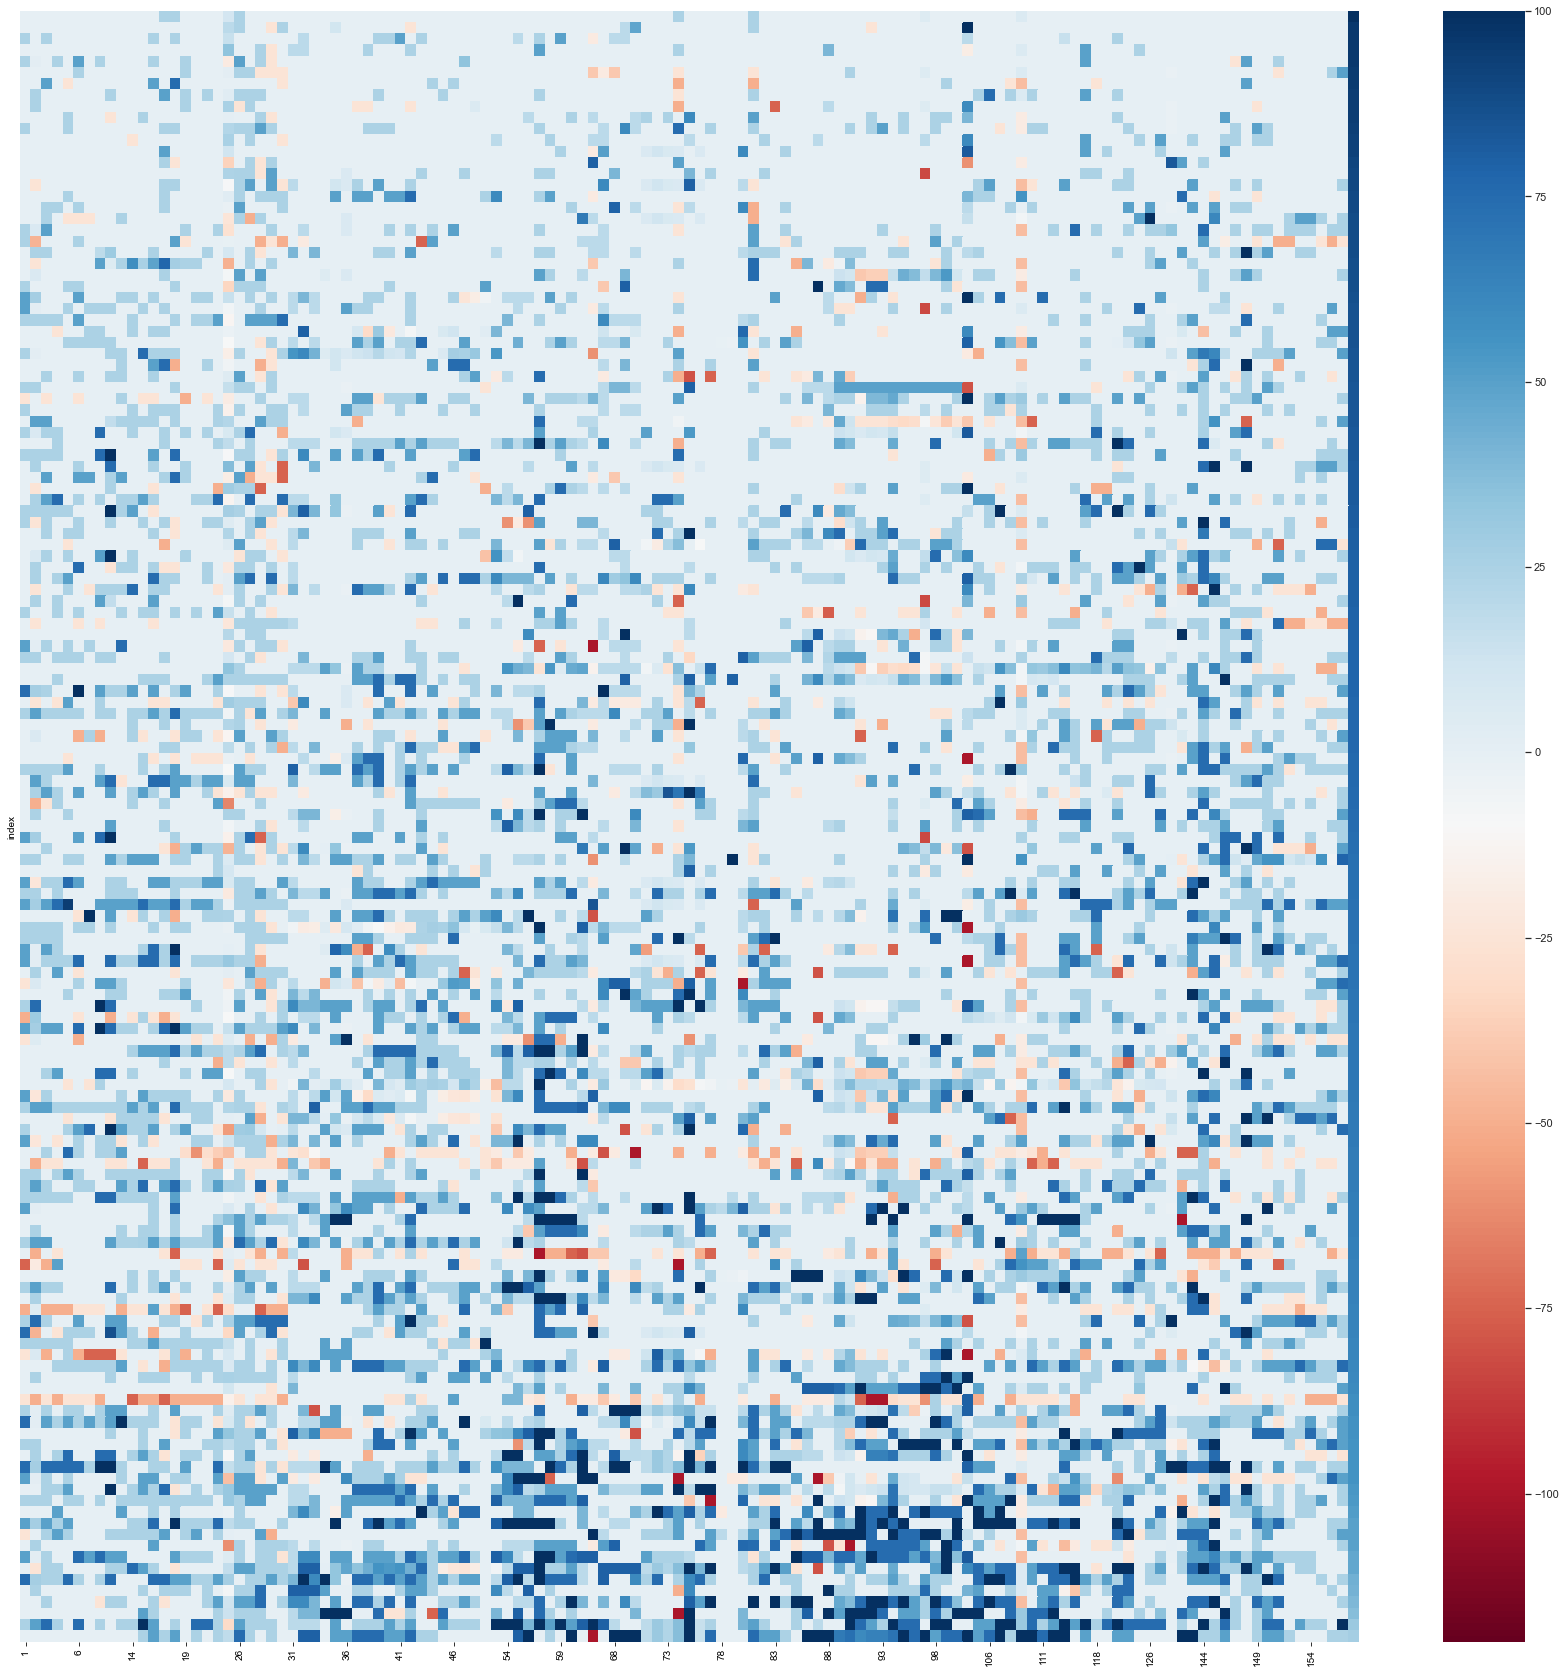

In [34]:
fig, ax1 = plt.subplots()

sns.set(font_scale=1)

ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

ax1 = sns.heatmap(df_heatmap, cmap="RdBu", yticklabels=0, annot=False, vmin=-120)

fig.set_size_inches(30,30)

plt.show()

<AxesSubplot:>

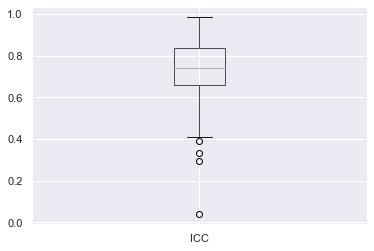

In [40]:
icc_join.boxplot()

In [42]:
icc_join.to_csv('output/icc_join_questions.csv')